<a href="https://colab.research.google.com/github/KrityHaqueCharu/machine-learning/blob/main/Machine_Learning_on_Melanoma_TRFrecords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Pre-processing 



In [ ]:
 %cd drive/MyDrive/datasets/

[Errno 2] No such file or directory: 'drive/MyDrive/datasets/'
/content/drive/MyDrive/datasets


In [ ]:


df=pd.read_csv('Melanoma TFRecords 256x256.csv')

df

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,2
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,3
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,2,2592,1936,365
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,11,6000,4000,798
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,3,1872,1053,931
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,11,1872,1053,860


In [ ]:
df.head(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,2
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,3
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,4
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0,1,6000,4000,5
6,ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0,14,5184,3456,6
7,ISIC_0075663,IP_6017204,female,35.0,torso,unknown,benign,0,11,2592,1936,7
8,ISIC_0075914,IP_7622888,male,30.0,torso,unknown,benign,0,0,6000,4000,8
9,ISIC_0076262,IP_5075533,female,50.0,lower extremity,unknown,benign,0,9,6000,4000,9


In [ ]:
df.shape

(33126, 12)

**Handling Missing Values**

In [ ]:
df.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
 8   tfrecord                       33126 non-null  int64  
 9   width                          33126 non-null  int64  
 10  height                         33126 non-null  int64  
 11  patient_code                   33126 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usag

In [ ]:
df_subset = df[df['sex'].notnull()] #Removing Sex row
df_subset

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,2
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,3
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,2,2592,1936,365
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,11,6000,4000,798
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,3,1872,1053,931
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,11,1872,1053,860


In [ ]:
df_subset.isnull().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         3
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer #imputing Age data

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(df_subset[['age_approx']])

df_subset['age_approx'] = impute.transform(df_subset[['age_approx']])

df_subset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,2
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,3
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,2,2592,1936,365
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,11,6000,4000,798
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,3,1872,1053,931
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,11,1872,1053,860


In [ ]:
df_subset.isnull().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [ ]:
df_subset.loc[df_subset.anatom_site_general_challenge.isnull()]

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code
33,ISIC_0086462,IP_3200260,female,30.0,NaN,unknown,benign,0,8,6000,4000,32
61,ISIC_0099474,IP_3057277,male,45.0,NaN,unknown,benign,0,7,6000,4000,56
188,ISIC_0174903,IP_2760044,male,40.0,NaN,unknown,benign,0,3,3264,2448,171
200,ISIC_0178744,IP_4248414,male,25.0,NaN,unknown,benign,0,2,5184,3456,180
305,ISIC_0204994,IP_5549010,female,30.0,NaN,nevus,benign,0,11,3264,2448,85
...,...,...,...,...,...,...,...,...,...,...,...,...
32898,ISIC_9928421,IP_0961415,male,45.0,NaN,unknown,benign,0,8,5184,3456,1300
33001,ISIC_9963692,IP_6017204,female,35.0,NaN,unknown,benign,0,11,2592,1936,7
33025,ISIC_9971473,IP_1005683,male,70.0,NaN,unknown,benign,0,4,3264,2448,1105
33041,ISIC_9975949,IP_9245079,male,40.0,NaN,nevus,benign,0,12,3264,2448,527


In [ ]:
df_subset.anatom_site_general_challenge.unique()

array(['head/neck', 'upper extremity', 'lower extremity', 'torso', nan,
       'palms/soles', 'oral/genital'], dtype=object)

In [ ]:
df_subset.diagnosis.unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

In [ ]:
#df_subset['anatom_site_general_challenge'].fillna("Unknown")

In [ ]:
#df_subset2 = df_subset[df_subset['anatom_site_general_challenge'].notnull()] #Remove Null values for anatom_site_general_challenge
#df_subset2

In [ ]:
df_subset.isnull().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

**Encoding Categorical Features** (One-hot)

In [ ]:
df.anatom_site_general_challenge.describe()

count     32599
unique        6
top       torso
freq      16845
Name: anatom_site_general_challenge, dtype: object

In [ ]:
category_enc = pd.get_dummies(df_subset['anatom_site_general_challenge']) #one-hot applied

category_enc.head()

,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [ ]:
bigdata = pd.concat([df_subset,category_enc], axis=1) #Merged
bigdata

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,0,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,2,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,3,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,2,2592,1936,365,0,0,0,0,1,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,11,6000,4000,798,0,0,0,0,1,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,3,1872,1053,931,0,1,0,0,0,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,11,1872,1053,860,0,1,0,0,0,0


In [ ]:
bigdata['sex'] = bigdata['sex'].map({'male':0,'female':1}) 
bigdata

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,IP_7279968,0,45.0,head/neck,unknown,benign,0,0,6000,4000,0,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,1,45.0,upper extremity,unknown,benign,0,0,6000,4000,1,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,1,50.0,lower extremity,nevus,benign,0,6,1872,1053,2,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,1,45.0,head/neck,unknown,benign,0,0,1872,1053,3,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,1,55.0,upper extremity,unknown,benign,0,11,6000,4000,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,0,50.0,torso,unknown,benign,0,2,2592,1936,365,0,0,0,0,1,0
33122,ISIC_9999320,IP_3650745,0,65.0,torso,unknown,benign,0,11,6000,4000,798,0,0,0,0,1,0
33123,ISIC_9999515,IP_2026598,0,20.0,lower extremity,unknown,benign,0,3,1872,1053,931,0,1,0,0,0,0
33124,ISIC_9999666,IP_7702038,0,50.0,lower extremity,unknown,benign,0,11,1872,1053,860,0,1,0,0,0,0


In [ ]:
bigdata = bigdata.drop('anatom_site_general_challenge', axis = 1)
bigdata.isnull().sum() #All missing values Handled 

image_name          0
patient_id          0
sex                 0
age_approx          0
diagnosis           0
benign_malignant    0
target              0
tfrecord            0
width               0
height              0
patient_code        0
head/neck           0
lower extremity     0
oral/genital        0
palms/soles         0
torso               0
upper extremity     0
dtype: int64

In [ ]:
bigdata

,image_name,patient_id,sex,age_approx,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,IP_7279968,0,45.0,unknown,benign,0,0,6000,4000,0,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,1,45.0,unknown,benign,0,0,6000,4000,1,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,1,50.0,nevus,benign,0,6,1872,1053,2,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,1,45.0,unknown,benign,0,0,1872,1053,3,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,1,55.0,unknown,benign,0,11,6000,4000,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,0,50.0,unknown,benign,0,2,2592,1936,365,0,0,0,0,1,0
33122,ISIC_9999320,IP_3650745,0,65.0,unknown,benign,0,11,6000,4000,798,0,0,0,0,1,0
33123,ISIC_9999515,IP_2026598,0,20.0,unknown,benign,0,3,1872,1053,931,0,1,0,0,0,0
33124,ISIC_9999666,IP_7702038,0,50.0,unknown,benign,0,11,1872,1053,860,0,1,0,0,0,0


**Spliting the dataset into features and labels**

In [ ]:
from sklearn.model_selection import train_test_split
y=bigdata['target']
x_train, x_test, y_train, y_test = train_test_split(bigdata.drop(['target','image_name','patient_id','diagnosis','benign_malignant'],axis=1),bigdata['target'],test_size=0.2,random_state=0,stratify = y)

print(x_train.shape)
print(x_test.shape)
x_train #Train_feature



(26448, 12)
(6613, 12)


,sex,age_approx,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
14609,0,70.0,9,3264,2448,128,0,0,0,0,0,1
11239,0,30.0,0,1872,1053,1759,0,1,0,0,0,0
9635,1,65.0,10,6000,4000,189,0,0,0,0,1,0
22526,0,55.0,12,6000,4000,768,0,0,0,0,1,0
23247,0,50.0,3,6000,4000,172,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27522,0,45.0,9,5184,3456,279,0,0,0,0,1,0
28303,1,35.0,12,6000,4000,105,0,0,0,0,0,1
19672,0,45.0,7,1872,1053,1865,0,0,0,0,1,0
19301,1,50.0,8,1872,1053,1395,0,0,0,0,1,0


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)
print("min before scaling: \n {}".format(x_train.min(axis=0)))
print("max before scaling: \n {}".format(x_train.max(axis=0)))

print("min After scaling: \n {}".format(x_train_scaled.min(axis=0)))
print("max After scaling: \n {}".format(x_train_scaled.max(axis=0)))
print("min After scaling X-test: \n {}".format(x_test_scaled.min(axis=0)))
print("max After scaling X-test: \n {}".format(x_test_scaled.max(axis=0)))

min before scaling: 
 principle component 1   -2399.071316
principle component 2    -853.705717
principle component 3    -533.447158
principle component 4     -47.206885
principle component 5      -7.504022
principle component 6      -0.822900
dtype: float64
max before scaling: 
 principle component 1    4096.726207
principle component 2    1420.137636
principle component 3    2767.299139
principle component 4      47.738762
principle component 5       8.542326
principle component 6       0.947194
dtype: float64
min After scaling: 
 [0. 0. 0. 0. 0. 0.]
max After scaling: 
 [1. 1. 1. 1. 1. 1.]
min After scaling X-test: 
 [0.         0.00043191 0.12300381 0.02913375 0.         0.04200114]
max After scaling X-test: 
 [0.99983126 0.99074357 1.         0.91892514 0.9642603  1.        ]


# Logistic Regression

In [ ]:
bigdata.head()

,image_name,patient_id,sex,age_approx,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,IP_7279968,0,45.0,unknown,benign,0,0,6000,4000,0,1,0,0,0,0,0
1,ISIC_0015719,IP_3075186,1,45.0,unknown,benign,0,0,6000,4000,1,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,1,50.0,nevus,benign,0,6,1872,1053,2,0,1,0,0,0,0
3,ISIC_0068279,IP_6890425,1,45.0,unknown,benign,0,0,1872,1053,3,1,0,0,0,0,0
4,ISIC_0074268,IP_8723313,1,55.0,unknown,benign,0,11,6000,4000,4,0,0,0,0,0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print( accuracy_score(y_test, predictions))
score_logistic=accuracy_score(y_test, predictions)

0.9821563586874339


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.974293059125964


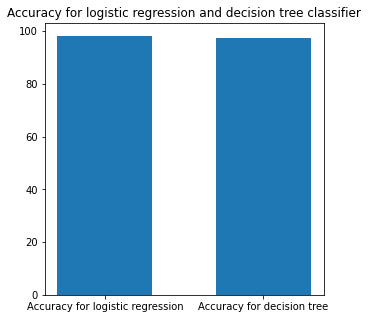

In [ ]:
import matplotlib.pyplot as plot
graph_size= plot.figure(figsize=(5,5))
addressed= ['Accuracy for logistic regression','Accuracy for decision tree']
accuracy=[score_logistic*100, score*100]
position=[0,1]
plot.bar(position,accuracy,width=0.6)
plot.xticks(position,addressed)
plot.title('Accuracy for logistic regression and decision tree classifier')
plot.show()

#Neural Network (Multilayer Perceptron Classifier)

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(x_train_scaled, y_train)
pre_PCA_NNC_score=nnc.score(x_test_scaled, y_test)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train_scaled, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test_scaled, y_test)))

The Training accuracy of the model is 0.98
The Testing accuracy of the model is 0.98


In [ ]:
predictions = nnc.predict(x_test_scaled)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[6504  109]
 [   0    0]]


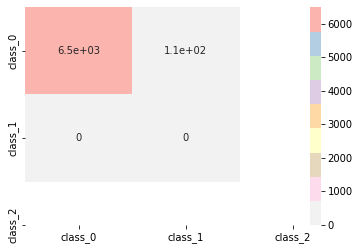

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

#SVC


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
pre_PCA_svc_score=svc.score(x_test_scaled, y_test)
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train_scaled, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test_scaled, y_test)))

Training accuracy of the model is 0.98
Testing accuracy of the model is 0.98


In [ ]:
predictions = svc.predict(x_test_scaled)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[6504  109]
 [   0    0]]


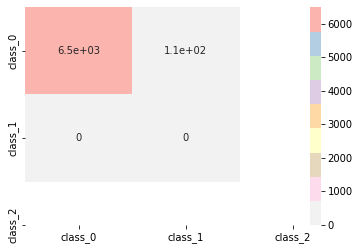

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
pre_PCA_RFC_score=rfc.score(x_test_scaled, y_test)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train_scaled, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test_scaled, y_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The Training accuracy of the model is 0.99
The Testing accuracy of the model is 0.98


In [ ]:
predictions = rfc.predict(x_test_scaled)
predictions

array([0, 0, 0, ..., 0, 0, 0])

#Dimensionality reduction using PCA

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=6)

In [ ]:
X= bigdata.drop(['target','image_name','patient_id','diagnosis','benign_malignant'],axis=1)
X.head()

,sex,age_approx,tfrecord,width,height,patient_code,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,0,45.0,0,6000,4000,0,1,0,0,0,0,0
1,1,45.0,0,6000,4000,1,0,0,0,0,0,1
2,1,50.0,6,1872,1053,2,0,1,0,0,0,0
3,1,45.0,0,1872,1053,3,1,0,0,0,0,0
4,1,55.0,11,6000,4000,4,0,0,0,0,0,1


In [ ]:
principal_components= pca.fit_transform(X)
print(principal_components)

[[-2.39907131e+03 -6.29935275e+02 -8.88904013e+00  3.02261809e+00
   6.76729771e+00  2.00358619e-01]
 [-2.39902683e+03 -6.28936267e+02 -8.89096192e+00  3.03128647e+00
   6.76811206e+00  5.25081601e-01]
 [ 2.66668951e+03 -8.53705713e+02 -1.23590847e+02 -4.94136633e+00
   1.09225583e+00  8.60774065e-01]
 ...
 [ 2.70803293e+03  7.42648044e+01 -1.25215511e+02  2.82427173e+01
   3.78568544e+00  6.50926685e-01]
 [ 2.70485949e+03  3.43812982e+00 -1.25193155e+02 -2.06235335e+00
  -3.96620045e+00  6.74744734e-01]
 [ 2.73377805e+03  6.52772833e+02 -1.26392111e+02  5.21000560e+00
   2.94734214e+00 -6.92598752e-01]]


In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2","principle component 3","principle component 4","principle component 5","principle component 6"])

In [ ]:
principal_df.head()

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6
0,-2399.071309,-629.935275,-8.889040,3.022618,6.767298,0.200359
1,-2399.026827,-628.936267,-8.890962,3.031286,6.768112,0.525082
2,2666.689506,-853.705713,-123.590847,-4.941366,1.092256,0.860774
3,2666.736186,-852.723605,-123.575836,0.109909,7.051573,0.330083
4,-2398.897845,-625.905426,-8.930294,-7.047029,-4.150601,0.554952


In [ ]:
x_train, x_test, y_train, y_test = train_test_split( principal_df, y , test_size=0.2, random_state=42)

In [ ]:
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [ ]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train_scaled, y_train)
post_PCA_RFC_score=rfc.score(x_test_scaled, y_test)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train_scaled, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test_scaled, y_test)))


The Training accuracy of the model is 0.99
The Testing accuracy of the model is 0.98


In [ ]:
svc = SVC(kernel="linear")
svc.fit(x_train_scaled, y_train)
post_PCA_SVC_score=rfc.score(x_test_scaled, y_test)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train_scaled, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test_scaled, y_test)))

The Training accuracy of the model is 0.99
The Testing accuracy of the model is 0.98


In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train_scaled, y_train)
post_PCA_NNC_score= rfc.score(x_test_scaled, y_test)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train_scaled, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test_scaled, y_test)))

The Training accuracy of the model is 0.99
The Testing accuracy of the model is 0.98


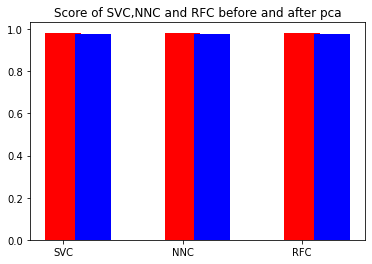

In [ ]:
import matplotlib.pyplot as plot
position=['svc','nnc','rfc']
position=np.arange(3)
pre_pca = [pre_PCA_svc_score, pre_PCA_NNC_score, pre_PCA_RFC_score]
post_pca = [post_PCA_SVC_score, post_PCA_NNC_score, post_PCA_RFC_score]
score= [pre_pca,post_pca]
plot.bar(position+0.00,score[0],color='r',width=0.30,label="Before PCA")
plot.bar(position+0.25,score[1],color='b',width=0.30,label="After PCA")
plot.title('Score of SVC,NNC and RFC before and after pca')
addressed=['SVC', 'NNC', 'RFC']
plot.xticks(position,addressed)
plot.show()
